# Sales Analysis

### Importing necessary libraries

In [1]:
import pandas as pd 
import os

## Merge from each month into one CSV

In [2]:
# merging 12 months of data into single files (Provides data containes 12 different files for all months)

# df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

# files = [file for file in os.listdir('./Sales_Data')]  #reading whole directory 

# all_months_data = pd.DataFrame() # empty dataframe for all merged data

# for file in files:
#     df = pd.read_csv('./Sales_Data/'+file)
#     all_months_data =pd.concat([all_months_data, df])
    
# all_months_data.to_csv('all_data.csv', index= False)

### Read in updated dataframe

In [3]:
all_data = pd.read_csv('./csv/all_data.csv')
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


# Clean up the data!

# update NaN

In [4]:
# drop rows with NaN

nan_df = all_data[all_data.isna().any(axis=1)]

all_data=all_data.dropna(how='all') 

all_data
 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Get rid of text in order date column

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#made a copy of dataframe 
copy_data= all_data.copy()
copy_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Make columns correct type

In [6]:
copy_data["Quantity Ordered"] = pd.to_numeric(copy_data["Quantity Ordered"])
copy_data["Price Each"] = pd.to_numeric(copy_data["Price Each"])
copy_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Augment data with additional columns

### Add month column

In [7]:
# Adding month column 

copy_data['month'] = copy_data['Order Date'].str[0:2]
copy_data['month'] = copy_data['month'].astype('int32')
copy_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [8]:
 #adding column wiht cities 

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

copy_data['City'] = copy_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
copy_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


# Data Exploration

# Q-1 = what was the best month for sales and how much money was made ? 

In [9]:
#add sales column per total order * price of each = total sales

copy_data['sales']= copy_data['Quantity Ordered'] * copy_data['Price Each']
copy_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles CA,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco CA,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco CA,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco CA,379.99


In [10]:
fsales = copy_data.groupby('month').sum()
fsales

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

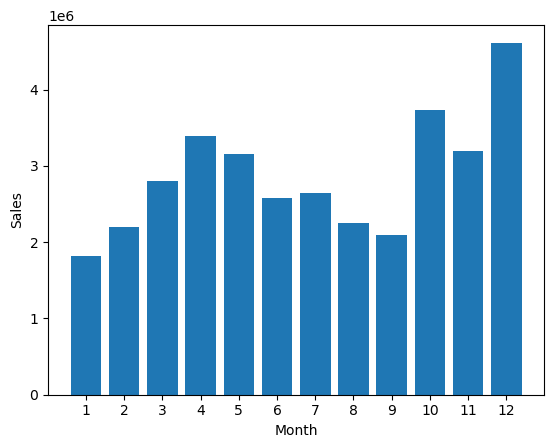

In [11]:
import matplotlib.pyplot as plt 

months = range(1,13)
plt.bar(months,fsales['sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show

## - Finding 
###    - *December was the best month for sale*
###    - *Total amount made in december month was $4613443.34*

# Q - 2 What city sold the most products?

In [12]:
maxsalecity = copy_data.groupby('City').sum()
maxsalecity

,Quantity Ordered,Price Each,month,sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [13]:
maxsalecity.sort_values('sales',ascending=False)

,Quantity Ordered,Price Each,month,sales
City,,,,
San Francisco CA,50239,8211461.74,315520,8262203.91
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Boston MA,22528,3637409.77,141112,3661642.01
Atlanta GA,16602,2779908.20,104794,2795498.58
Dallas TX,16730,2752627.82,104620,2767975.40
Seattle WA,16553,2733296.01,104941,2747755.48
Portland OR,11303,1860558.22,70621,1870732.34
Austin TX,11153,1809873.61,69829,1819581.75


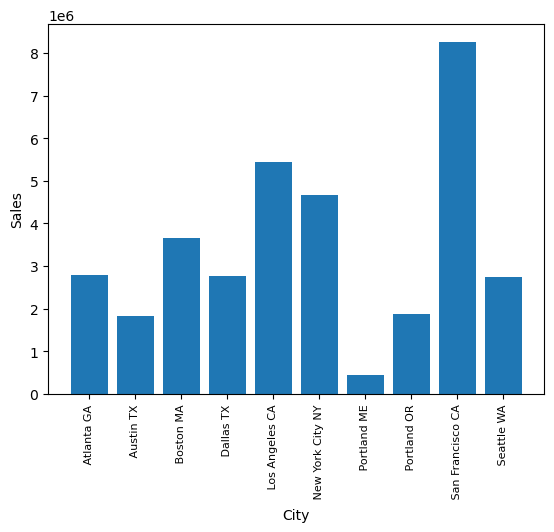

In [14]:
import matplotlib.pyplot as plt 

cities = [city for city,i in copy_data.groupby('City')]

plt.bar(cities,maxsalecity['sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

## - Finding 
###    - *San Francisco CA	sold the highest product in a year*
###    - *Los Angeles CA sold second highest pproducts after San Francisco CA*

# Q- 3 what time should we display advertisements to maximize likelihood of customer's buying product ? 

In [15]:
copy_data['Order Date'] = pd.to_datetime(copy_data['Order Date'])

In [16]:
copy_data['hour']=copy_data['Order Date'].dt.hour
copy_data['minute']=copy_data['Order Date'].dt.minute
copy_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,sales,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,9,27


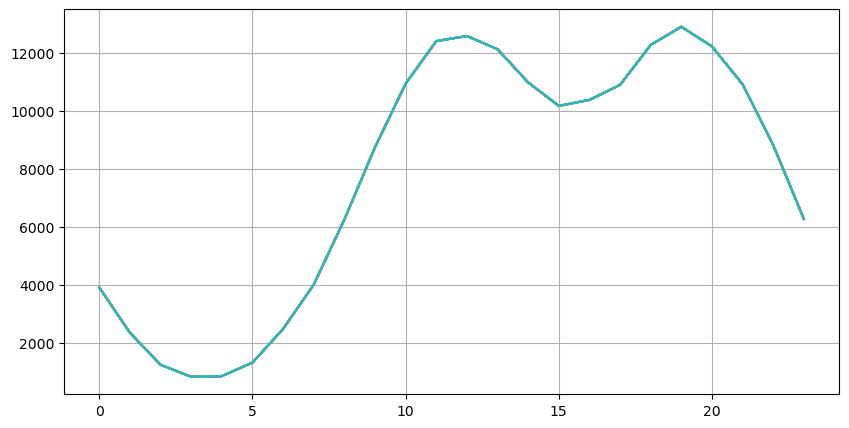

In [17]:
hours = [hour for hour, df in copy_data.groupby('hour')]
# here count total number of orderes placed at particular hour
plt.figure(figsize=(10,5))
plt.plot(hours,copy_data.groupby(['hour']).count()) 
plt.grid()
plt.show()

## - Finding 
###    - *Recommendation of slightly before 11am or 7pm can be made for most appropriate time for advertisement*


# Q - 4 what products are solt together ? 

In [18]:
#same order id can help finding products sold together

df = copy_data[copy_data['Order ID'].duplicated(keep=False)]  

df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 

#droping duplicated occurences of all items
df = df[['Order ID','grouped']].drop_duplicates()

df.head(20)

C:\Users\FORAM\AppData\Local\Temp\ipykernel_12976\4251624594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [19]:
from itertools import combinations
from collections import Counter 

count = Counter()
for row in df['grouped']:
    row_list = row.split(',')
#     print(row_list)
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## - Finding 
###    - *iphone and Lightning charging cable is mostly sold together*
###    - *Google Phone and USB-C Charging Cable are second most sold together products*
###    - *Lightning charging cable and wires headphones are products that are least bought at the same time *

# Q - 5 what product sold the most ? and why do you think it sold the most ?

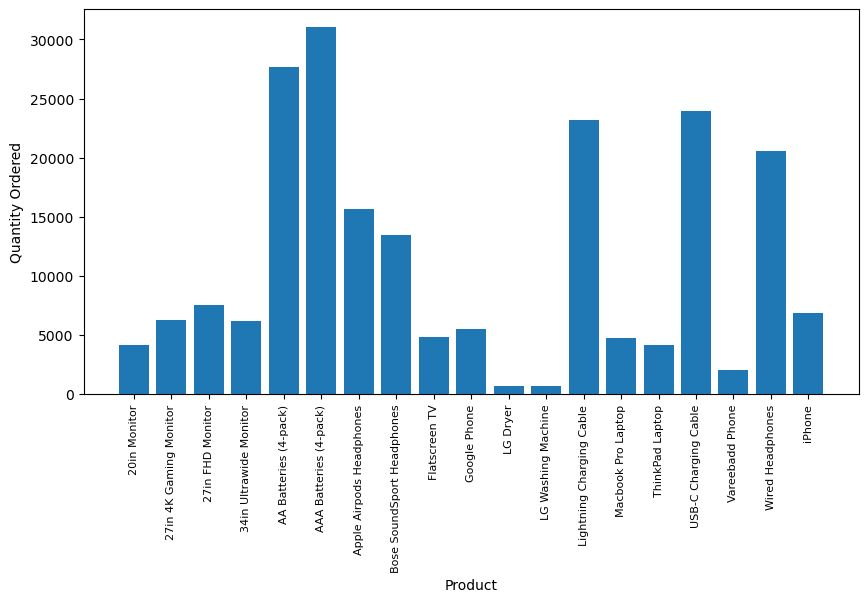

In [20]:
product_group = copy_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.figure(figsize=(10,5))
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = 'vertical',size =8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\FORAM\AppData\Local\Temp\ipykernel_12976\2206027262.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation ='vertical',size =9)


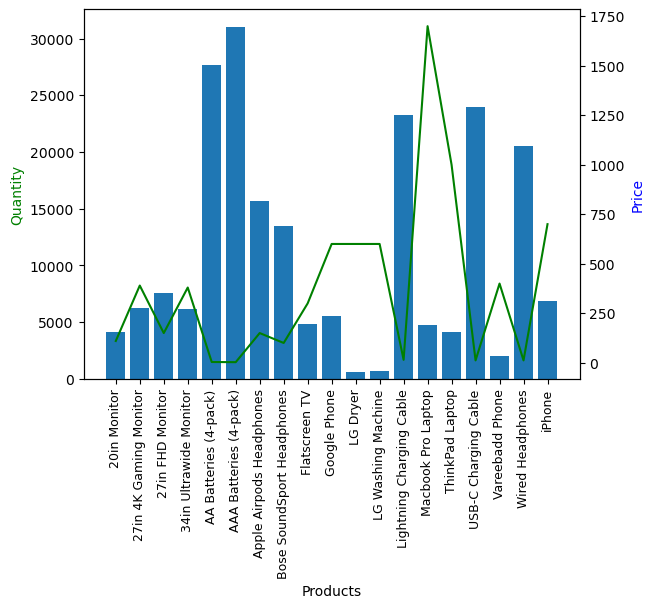

In [21]:
# to prove correlation between cost and quantity sold

prices = copy_data.groupby('Product').mean()['Price Each']
print(prices)

fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,'g-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity',color ='g')
ax2.set_ylabel("Price",color = 'b')
ax1.set_xticklabels(products,rotation ='vertical',size =9)
plt.show()

## - Finding 
###    - *AAA batteries and AA batteries are highest sold product followed by USB-C charging cable and lightning charging cable*
###    - *One way the Reason of them being sold highest can be given by correlation between Quantity and Price*
###    - *As price increase Quantity sold decreases*